# Photo Quality


Use the "Run" button to execute the code.

# Installing Libaries and downloading dataset

In [3]:
import matplotlib.pyplot as plt 
import seaborn as sns 
import pandas as pd 
import numpy as np 
import matplotlib 
import os
%matplotlib inline

In [4]:
pd.set_option('display.max_columns' ,None)
pd.set_option('display.max_rows' , 150) 
sns.set_style('darkgrid') 
matplotlib.rcParams['font.size'] = 14 
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor']= '#00000000'

# Exploring datasets

In [5]:
photo_df = pd.read_csv('training.csv')

In [6]:
test_df = pd.read_csv('test.csv')

In [7]:
photo_df

,id,latitude,longitude,width,height,size,name,description,caption,good
0,1,45,16,604,453,31,454 1659,NaN,NaN,1
1,2,21,-87,720,534,43,2068 483,687 1182 1309 2068 2107 78 89 453 1905 712 120...,830 2112 1914 792 814 1386 474 2146 1591 194 5...,0
2,3,38,-97,720,540,71,802,NaN,NaN,0
3,4,38,-122,604,453,24,NaN,924 1914 671 853 193 51 744 1437 1245 563 1410...,665 2040 792 1056 226 248 1612 1920 617 1365 1...,0
4,5,-29,24,720,540,13,1766 20,NaN,181 891 22 2123 2107 523 2080 683 1640 166 109...,0
...,...,...,...,...,...,...,...,...,...,...
40257,40259,39,-77,604,453,18,919 1905 2088,1490 1644 919 1905 2088 1192 796,687 830 1017 990 2123 22 1309 1903 611 1304 12...,0
40258,40260,38,-120,604,453,4,1325 1348,2018 1426,1744 2015 658 164 54,0
40259,40261,29,-82,604,453,37,51 1829 367,NaN,786 830 1347 2057 792 1826 1716 1920 2041 171 ...,0
40260,40262,24,121,604,453,25,1443 1869,NaN,368 2029 1309 1573 755 370 1905 1823 916 740 1...,1


In [8]:
photo_df.shape

(40262, 10)

In [9]:
test_df

,id,latitude,longitude,width,height,size,name,description,caption
0,40265,34,-118,640,478,1,51 125,NaN,1481 1905 2060 2071 483
1,40266,34,-83,413,604,12,744,749 1905 36 740 1433,NaN
2,40267,42,-87,720,480,44,2102 670,2040 643 594 297 1881 737 1304 2102 2136 712 1...,807 142
3,40268,54,-2,604,453,18,1744,NaN,NaN
4,40269,20,77,604,405,60,193 944,NaN,NaN
...,...,...,...,...,...,...,...,...,...
11995,52260,42,-75,720,540,71,2119,NaN,2073 880 1914 1612 1040 1304 1920 1915 1365 51...
11996,52261,26,-80,604,453,60,2068,NaN,1733 875 474 1200 469 51 1939 439 1616
11997,52262,36,-120,604,402,17,NaN,51 2070 1901 367,1048 2132
11998,52263,47,-112,604,453,33,772,NaN,2068 1123 712


In [10]:
photo_df.dtypes

id              int64
latitude        int64
longitude       int64
width           int64
height          int64
size            int64
name           object
description    object
caption        object
good            int64
dtype: object

In [11]:
photo_df['description'].value_counts()

1237 2002                                 241
51                                         42
1905                                       34
1838                                       31
744                                        22
                                         ... 
2070 206                                    1
1749 1128 2030 942 51 580 807               1
969 540 975 1976 1905 883 740 158 1572      1
2107 51                                     1
709 51 175                                  1
Name: description, Length: 11323, dtype: int64

In [12]:
photo_df.describe()

,id,latitude,longitude,width,height,size,good
count,40262.000000,40262.000000,40262.000000,40262.000000,40262.000000,40262.000000,40262.000000
mean,20132.204312,30.342854,-37.662213,587.654265,503.571581,39.872783,0.262133
std,11623.143325,20.503580,81.312267,108.089076,105.710218,42.195029,0.439800
min,1.000000,-55.000000,-175.000000,0.000000,0.000000,1.000000,0.000000
25%,10066.250000,24.000000,-98.000000,540.000000,453.000000,12.000000,0.000000
50%,20132.500000,37.000000,-76.000000,604.000000,453.000000,27.000000,0.000000
75%,30197.750000,42.000000,19.000000,640.000000,576.000000,55.000000,1.000000
max,40263.000000,72.000000,178.000000,720.000000,720.000000,1030.000000,1.000000


# Handling Categorical Features

In [13]:
#identifying categorical columns
cat_train = [feature for feature in photo_df if photo_df[feature].dtypes == 'O']
cat_test = [feature for feature in test_df if test_df[feature].dtypes == 'O']


In [14]:
#extracting train categorical cols
photo_df['names'] = photo_df['name'].str.extract(r'.*(\d\d).*').astype(float)
photo_df['descriptions'] = photo_df['description'].str.extract(r'.*(\d\d).*').astype(float)
photo_df['captions'] = photo_df['caption'].str.extract(r'.*(\d\d).*').astype(float)


In [15]:
#extracting test categorical cols
test_df['names'] = test_df['name'].str.extract(r'.*(\d\d).*').astype(float)
test_df['descriptions'] = test_df['description'].str.extract(r'.*(\d\d).*').astype(float)
test_df['captions'] = test_df['caption'].str.extract(r'.*(\d\d).*').astype(float)


In [16]:
#now we can drop all the features in train and test cat cols since we have extracted some files from them
photo_df.drop(columns = ['name', 'description','caption'], inplace= True)
test_df.drop(columns = ['name', 'description','caption'], inplace= True)

In [17]:
photo_df.dtypes

id                int64
latitude          int64
longitude         int64
width             int64
height            int64
size              int64
good              int64
names           float64
descriptions    float64
captions        float64
dtype: object

In [18]:
test_df.dtypes

id                int64
latitude          int64
longitude         int64
width             int64
height            int64
size              int64
names           float64
descriptions    float64
captions        float64
dtype: object

In [19]:
#re odering the train dataset
photos_df = photo_df[['id','latitude','longitude','width','height','size','names','descriptions','captions','good']]

# Missing Values and Scaling

In [20]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import RobustScaler, OneHotEncoder,LabelEncoder
from sklearn.model_selection import train_test_split

In [21]:
photos_df.isna().sum()

id                  0
latitude            0
longitude           0
width               0
height              0
size                0
names            4822
descriptions    27564
captions        11808
good                0
dtype: int64

In [22]:
test_df.isna().sum()

id                 0
latitude           0
longitude          0
width              0
height             0
size               0
names           1482
descriptions    8258
captions        3558
dtype: int64

In [23]:
input_cols, target_col = photos_df.columns[1:-1], 'good'
inputs_df, targets = photos_df[input_cols].copy(), photos_df[target_col].copy()

In [24]:
#let us fill in the missing values with median
#TRAIN
names_med = photos_df['names'].median()
descriptions_med = photos_df['descriptions'].median()
captions_med = photos_df['captions'].median()

#TEST
names_med = test_df['names'].median()
descriptions_med = test_df['descriptions'].median()
captions_med = test_df['captions'].median()



In [25]:
#TRAIN
photos_df['names'].fillna(names_med, inplace = True)
photos_df['descriptions'].fillna(descriptions_med, inplace = True)
photos_df['captions'].fillna(captions_med, inplace = True)

#TEST
test_df['names'].fillna(names_med, inplace = True)
test_df['descriptions'].fillna(descriptions_med, inplace = True)
test_df['captions'].fillna(captions_med, inplace = True)

c:\ProgramData\Anaconda3\envs\tensorflow\lib\site-packages\pandas\core\generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [26]:
numeric_train = photos_df[input_cols].select_dtypes(include=np.number).columns.tolist()
numeric_test = photos_df[input_cols].select_dtypes(include=np.number).columns.tolist()

In [27]:
# scaling train
imputer = SimpleImputer().fit(inputs_df[numeric_train])
inputs_df[numeric_train] = imputer.transform(inputs_df[numeric_train])
scaler = RobustScaler().fit(inputs_df[numeric_train])
inputs_df[numeric_train] = scaler.transform(inputs_df[numeric_train])
#scaling test
imputer = SimpleImputer().fit(inputs_df[numeric_test])
inputs_df[numeric_test] = imputer.transform(inputs_df[numeric_test])
scaler = RobustScaler().fit(inputs_df[numeric_test])
inputs_df[numeric_test] = scaler.transform(inputs_df[numeric_test])

In [28]:
train_inputs, val_inputs, train_targets, val_targets = train_test_split(
    inputs_df[numeric_train], targets, test_size=0.25, random_state=42)

In [29]:
scaled_test = inputs_df[numeric_test]

In [30]:
scaled_test.describe()

,latitude,longitude,width,height,size,names,descriptions,captions
count,40262.000000,40262.000000,40262.000000,40262.000000,40262.000000,4.026200e+04,4.026200e+04,4.026200e+04
mean,-0.369841,0.327673,-0.163457,0.411151,0.299367,3.670779e-17,-5.252037e-16,3.388411e-17
std,1.139088,0.694977,1.080891,0.859433,0.981280,6.418922e-01,1.666628e+01,1.041250e+00
min,-5.111111,-0.846154,-6.040000,-3.682927,-0.604651,-9.778008e-01,-4.726729e+01,-2.190897e+00
25%,-0.722222,-0.188034,-0.640000,0.000000,-0.348837,-4.995399e-01,0.000000e+00,-4.517665e-01
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00
75%,0.277778,0.811966,0.360000,1.000000,0.651163,5.004601e-01,0.000000e+00,5.482335e-01
max,1.944444,2.170940,1.160000,2.170732,23.325581,1.174373e+00,5.173271e+01,2.113451e+00


# Visualization

In [31]:
pip install plotly

In [32]:
import plotly.express as px

In [33]:
px.histogram(photos_df, 
             x='latitude', 
             title='latitude vs. photo_quality', 
             color=photos_df['good'])

In [34]:
px.histogram(photos_df, 
             x='longitude', 
             title='longitude vs. photo_quality', 
             color=photos_df['good'])

# Correlation Heat Map


Correlation heat map helps to kmow the correlaton between features. Correlation of 1 shows that features are perfectly correlated, correlation of -1 shows that features are inversely correlated (i.e as one goes up the other decreases) and a correlation of 0 shows that there is no correlstion between features
if we have two features with a very high correlation, one of them can be dropped to reduce noise.
Note that the dependent feature has to be dropped first

In [35]:
photos_df

,id,latitude,longitude,width,height,size,names,descriptions,captions,good
0,1,45,16,604,453,31,59.0,45.0,48.0,1
1,2,21,-87,720,534,43,83.0,13.0,41.0,0
2,3,38,-97,720,540,71,2.0,45.0,48.0,0
3,4,38,-122,604,453,24,43.0,6.0,9.0,0
4,5,-29,24,720,540,13,20.0,45.0,62.0,0
...,...,...,...,...,...,...,...,...,...,...
40257,40259,39,-77,604,453,18,88.0,96.0,97.0,0
40258,40260,38,-120,604,453,4,48.0,26.0,54.0,0
40259,40261,29,-82,604,453,37,67.0,45.0,18.0,0
40260,40262,24,121,604,453,25,69.0,45.0,62.0,1


In [36]:
corr = photos_df.iloc[:, :-1].corr() #remving the dependent feature i.e ['good']


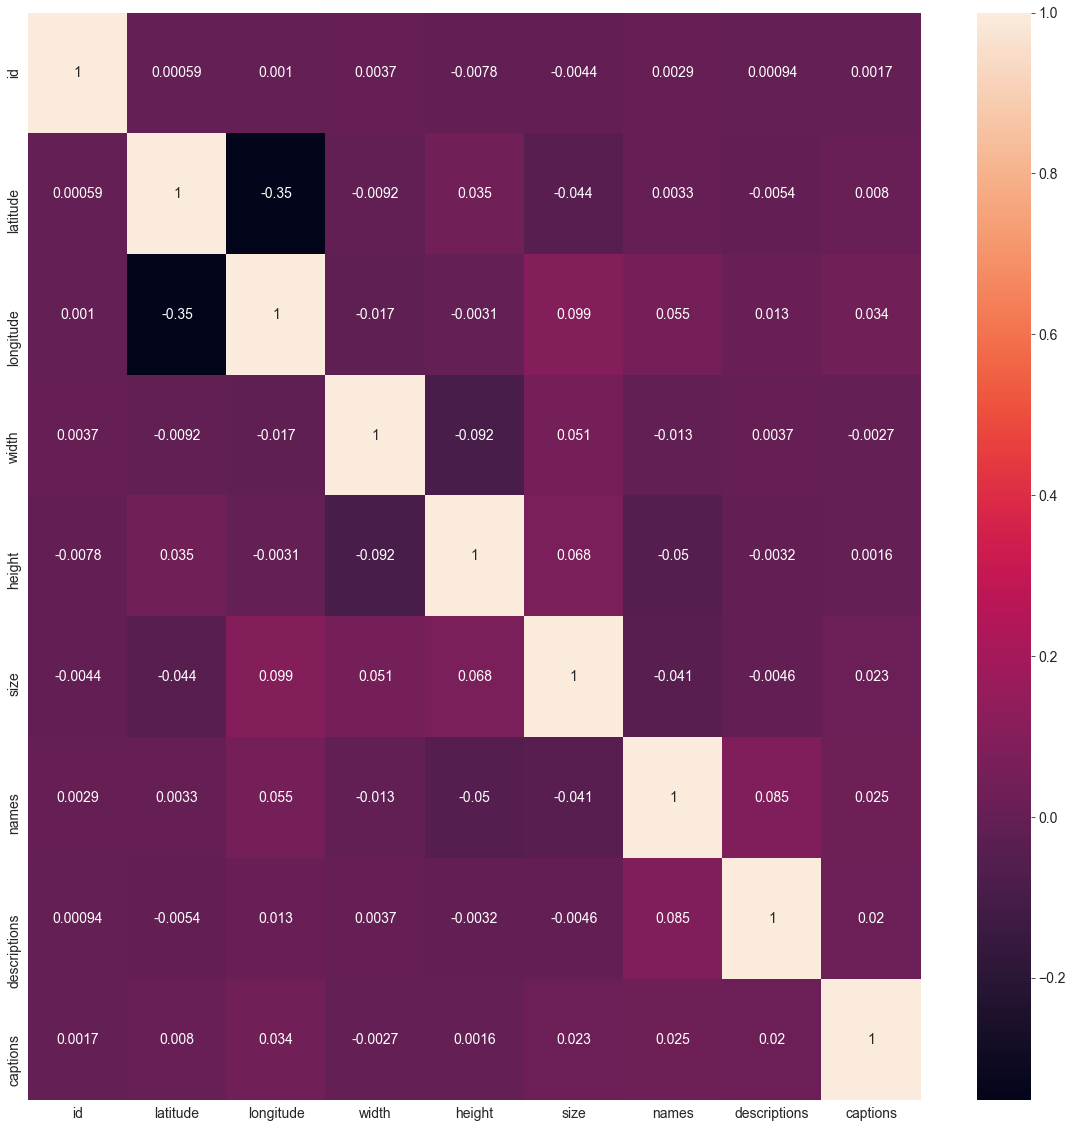

In [37]:
correlation = corr.index
plt.figure(figsize = (20, 20))
sns.heatmap(photos_df[correlation].corr(), annot = True)

From the heat map, we can see that the correlation between features are not too much, so there is no need to drop any feature

# RandomForestClassifier 

In [38]:
from sklearn.ensemble import RandomForestClassifier

In [39]:
model1 = RandomForestClassifier()

In [40]:
%%time
model1.fit(train_inputs,train_targets)

Wall time: 4.88 s


RandomForestClassifier()

In [41]:
importance_df = pd.DataFrame({
    'feature': train_inputs.columns,
    'importance': model1.feature_importances_
}).sort_values('importance', ascending=False)

In [42]:
importance_df.head(10)

,feature,importance
4,size,0.178424
1,longitude,0.169254
5,names,0.143564
7,captions,0.141704
0,latitude,0.140500
3,height,0.089427
6,descriptions,0.076718
2,width,0.060408


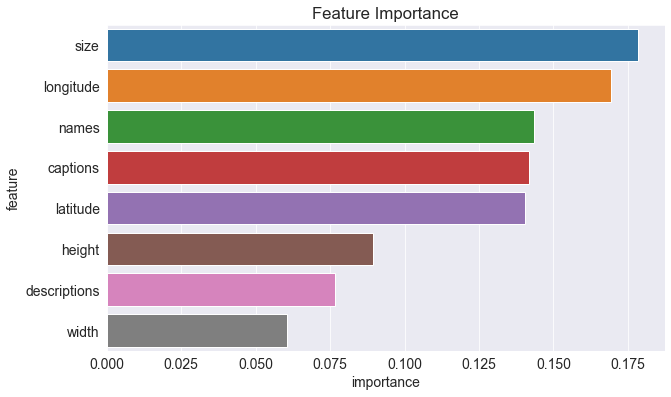

In [43]:
plt.title('Feature Importance')
sns.barplot(data=importance_df.head(10), x='importance', y='feature');

Size seems to be the most important feature

In [44]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [45]:
def predict_and_plot(inputs, targets, name=''):
    preds = model1.predict(inputs)
    
    accuracy = accuracy_score(targets, preds)
    print("Accuracy: {:.2f}%".format(accuracy * 100))
    
    cf = confusion_matrix(targets, preds, normalize='true')
    plt.figure()
    sns.heatmap(cf, annot=True)
    plt.xlabel('Prediction')
    plt.ylabel('Target')
    plt.title('{} Confusion Matrix'.format(name));
    
    return preds

Accuracy: 99.89%


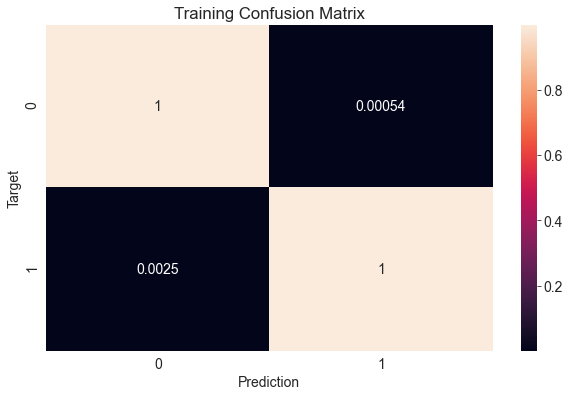

In [46]:
train_preds = predict_and_plot(train_inputs, train_targets, 'Training')

Accuracy: 75.80%


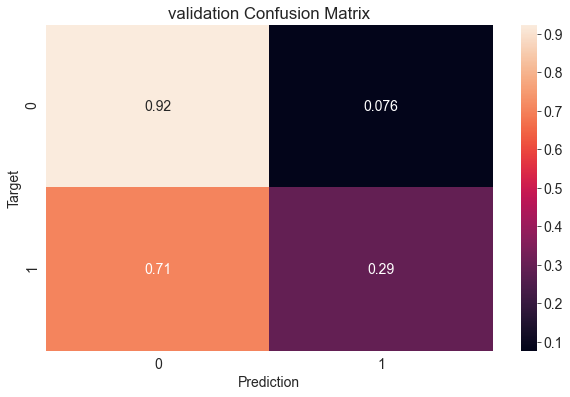

In [47]:
test_preds = predict_and_plot(val_inputs, val_targets, 'validation')

In [48]:
model1.estimators_[0]

DecisionTreeClassifier(max_features='auto', random_state=1496511456)

In [49]:
from sklearn.tree import plot_tree, export_text

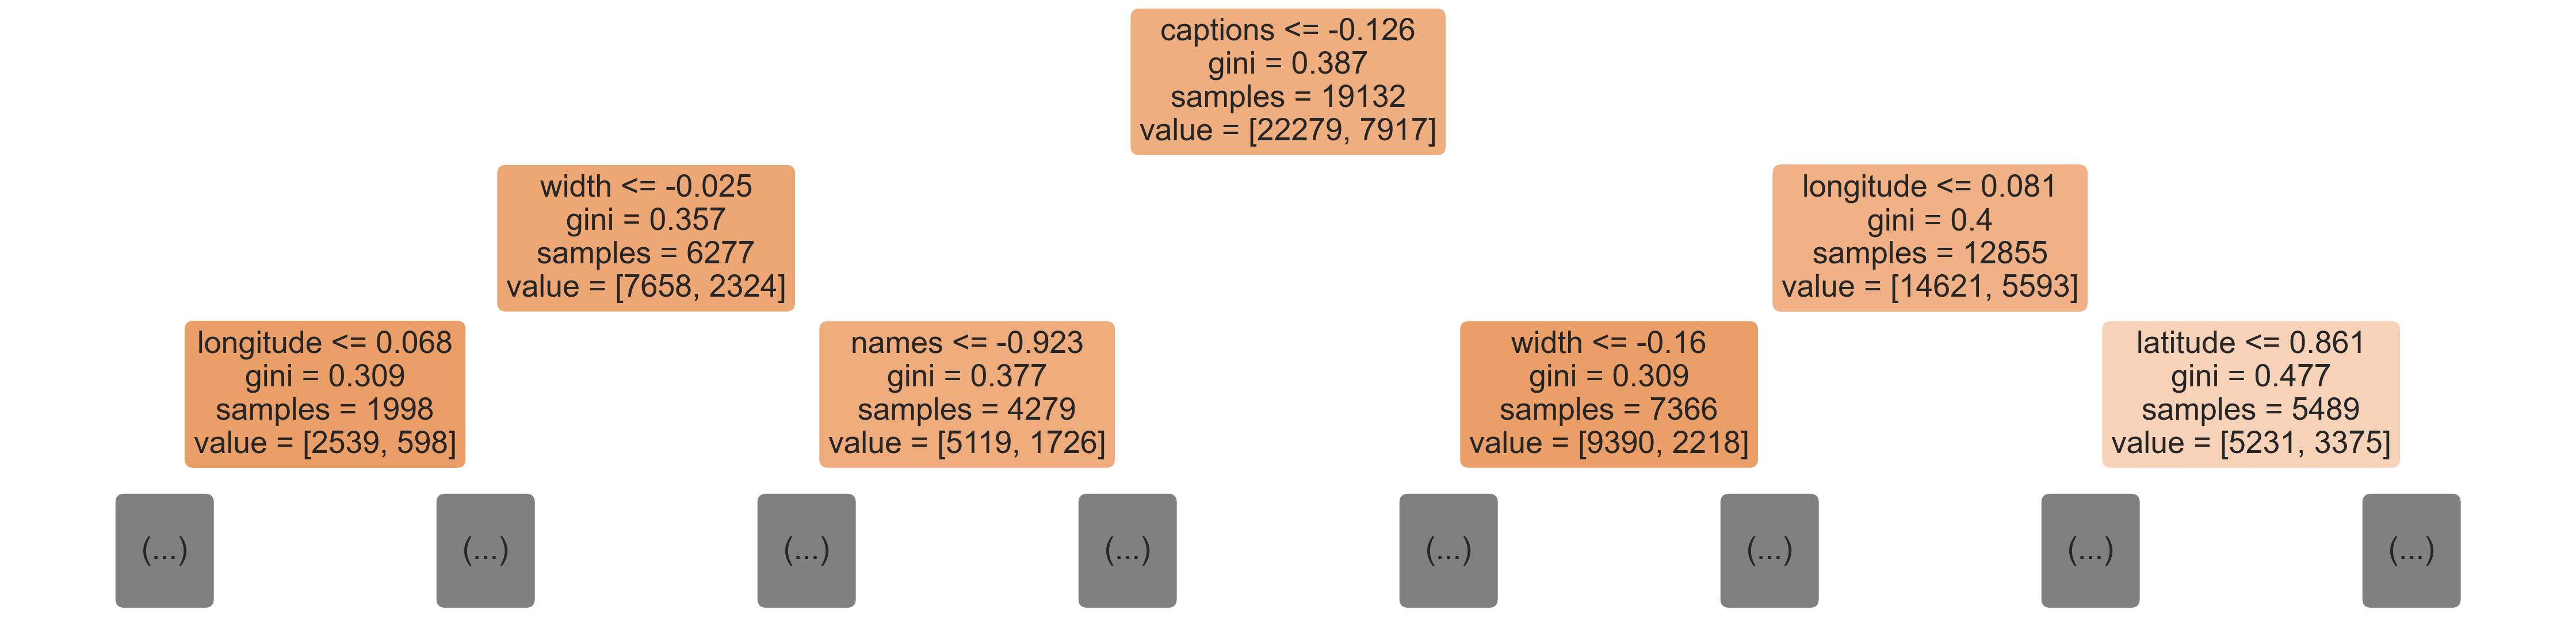

In [50]:
plt.figure(figsize=(80,20))
plot_tree(model1.estimators_[0], max_depth=2, feature_names=train_inputs.columns, filled=True, rounded=True);

In [51]:
test_pred = model1.predict_proba(scaled_test)
random_forest_pred = pd.DataFrame(test_pred)
random_forest_pred.columns = ['No', 'Yes']
random_forest_pred


,No,Yes
0,0.075,0.925
1,0.730,0.270
2,0.960,0.040
3,0.990,0.010
4,0.795,0.205
...,...,...
40257,0.890,0.110
40258,0.970,0.030
40259,0.980,0.020
40260,0.330,0.670


In [52]:
!pip install xgboost

# Xgboost

In [53]:
from xgboost import XGBClassifier

In [54]:
model2 = XGBClassifier()

In [55]:
%%time
model2.fit(train_inputs,train_targets)

Wall time: 2.27 s


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [56]:
def predict_and_plot(inputs, targets, name=''):
    preds = model2.predict(inputs)
    
    accuracy = accuracy_score(targets, preds)
    print("Accuracy: {:.2f}%".format(accuracy * 100))
    
    cf = confusion_matrix(targets, preds, normalize='true')
    plt.figure()
    sns.heatmap(cf, annot=True)
    plt.xlabel('Prediction')
    plt.ylabel('Target')
    plt.title('{} Confusion Matrix'.format(name));
    
    return preds

Accuracy: 83.38%


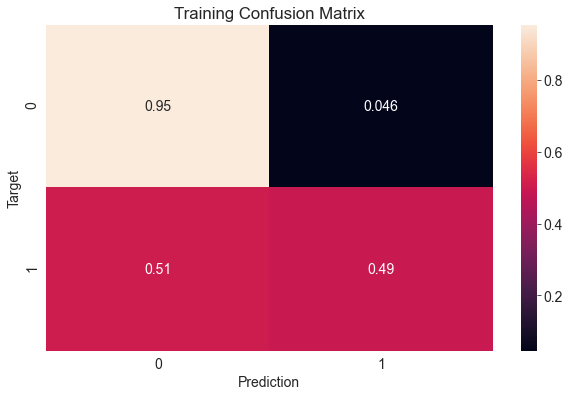

In [57]:
train_pred = predict_and_plot(train_inputs, train_targets, 'Training')

Accuracy: 75.88%


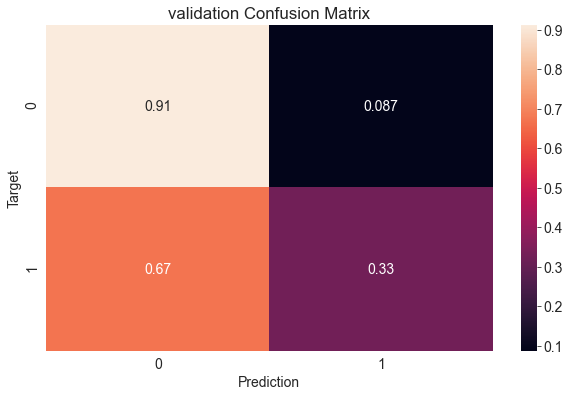

In [58]:
test_pred = predict_and_plot(val_inputs, val_targets, 'validation')

# Catboost

In [59]:
!pip install catboost

In [60]:
from sklearn.metrics import roc_auc_score
from catboost import CatBoostClassifier


In [61]:
model3 = CatBoostClassifier() 

In [62]:
%%time
model3.fit(train_inputs,train_targets)

Learning rate set to 0.044144
0:	learn: 0.6773812	total: 169ms	remaining: 2m 48s
1:	learn: 0.6637782	total: 185ms	remaining: 1m 32s
2:	learn: 0.6510082	total: 203ms	remaining: 1m 7s
3:	learn: 0.6396473	total: 217ms	remaining: 54.1s
4:	learn: 0.6290473	total: 233ms	remaining: 46.4s
5:	learn: 0.6196894	total: 245ms	remaining: 40.5s
6:	learn: 0.6118910	total: 260ms	remaining: 36.9s
7:	learn: 0.6042759	total: 273ms	remaining: 33.9s
8:	learn: 0.5967751	total: 294ms	remaining: 32.3s
9:	learn: 0.5906897	total: 314ms	remaining: 31.1s
10:	learn: 0.5848269	total: 334ms	remaining: 30s
11:	learn: 0.5795145	total: 353ms	remaining: 29s
12:	learn: 0.5745743	total: 368ms	remaining: 27.9s
13:	learn: 0.5708280	total: 384ms	remaining: 27.1s
14:	learn: 0.5664707	total: 399ms	remaining: 26.2s
15:	learn: 0.5629682	total: 418ms	remaining: 25.7s
16:	learn: 0.5596615	total: 433ms	remaining: 25.1s
17:	learn: 0.5567116	total: 448ms	remaining: 24.4s
18:	learn: 0.5537864	total: 461ms	remaining: 23.8s
19:	learn: 0.

In [63]:
def predict_and_plot(inputs, targets, name=''):
    preds = model3.predict(inputs)
    
    accuracy = accuracy_score(targets, preds)
    print("Accuracy: {:.2f}%".format(accuracy * 100))
    
    cf = confusion_matrix(targets, preds, normalize='true')
    plt.figure()
    sns.heatmap(cf, annot=True)
    plt.xlabel('Prediction')
    plt.ylabel('Target')
    plt.title('{} Confusion Matrix'.format(name));
    
    return preds

Accuracy: 80.84%


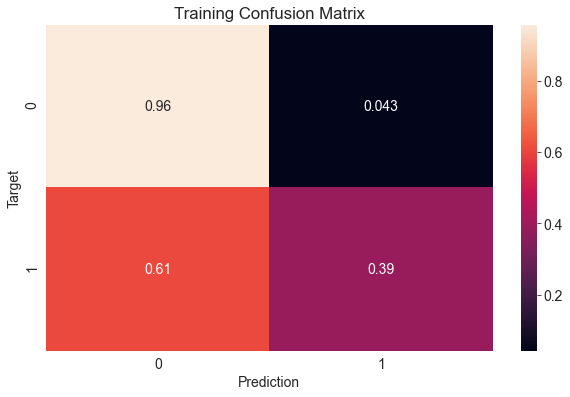

In [64]:
train_pred = predict_and_plot(train_inputs, train_targets, 'Training')

Accuracy: 76.53%


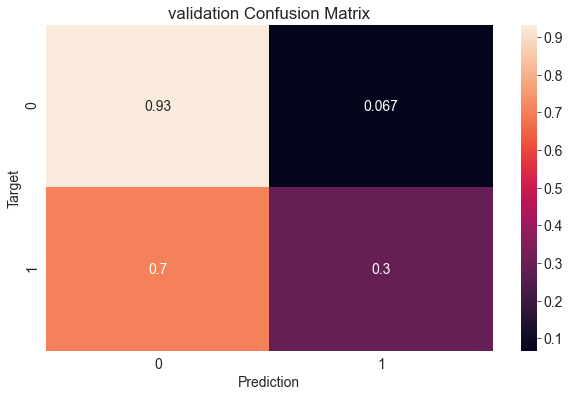

In [65]:
test_pred = predict_and_plot(val_inputs, val_targets, 'validation')

# Hyperparameter tuning (catboost)

In [66]:
# def test_params(**params):
#     model = CatBoostClassifier(**params).fit(train_inputs, train_targets)
#     train_acc = accuracy_score(model.predict(train_inputs), train_targets)
#     test_acc = accuracy_score(model.predict(val_inputs), val_targets)
#     return train_acc, test_acc

In [67]:
# test_params(n_estimators=20, max_depth=7)

In [68]:
# def test_param_and_plot(param_name, param_values):
#     train_accs, val_accs = [], [] 
#     for value in param_values:
#         params = {param_name: value}
#         train_acc, val_acc = test_params(**params)
#         train_accs.append(train_acc)
#         val_accs.append(val_acc)
#     plt.figure(figsize=(10,6))
#     plt.title('Overfitting curve: ' + param_name)
#     plt.plot(param_values, train_accs, 'b-o')
#     plt.plot(param_values, val_accs, 'r-o')
#     plt.xlabel(param_name)
#     plt.ylabel('accuracy')
#     plt.legend(['Training', 'Validation'])

In [69]:
#  test_param_and_plot('learning_rate', [0.04, 0.05,0.06,0.07])

0.040 seems to be the best learning rate for validation accuracy

In [70]:
#  test_param_and_plot('depth', [5, 9, 10])

As the learning rate increases, the accuracy of train predictions increases (overfitting), whilst the validation accuracy remains almost the same

In [71]:
#  test_param_and_plot('n_estimators', [6500,7000])

In [72]:
# test_param_and_plot('random_state', [1500,2000,2500])

In [73]:
#Applying the hyperparameters
model = CatBoostClassifier(random_state = 2000, n_estimators = 6000, max_depth = 7,learning_rate =0.04)
model.fit(train_inputs,train_targets)

0:	learn: 0.6790993	total: 23.1ms	remaining: 2m 18s
1:	learn: 0.6662046	total: 49.4ms	remaining: 2m 28s
2:	learn: 0.6540568	total: 115ms	remaining: 3m 49s
3:	learn: 0.6433967	total: 145ms	remaining: 3m 36s
4:	learn: 0.6334347	total: 172ms	remaining: 3m 26s
5:	learn: 0.6241918	total: 233ms	remaining: 3m 52s
6:	learn: 0.6158928	total: 253ms	remaining: 3m 36s
7:	learn: 0.6085943	total: 282ms	remaining: 3m 31s
8:	learn: 0.6013362	total: 341ms	remaining: 3m 46s
9:	learn: 0.5955108	total: 404ms	remaining: 4m 1s
10:	learn: 0.5894750	total: 431ms	remaining: 3m 54s
11:	learn: 0.5841313	total: 500ms	remaining: 4m 9s
12:	learn: 0.5788397	total: 531ms	remaining: 4m 4s
13:	learn: 0.5740310	total: 633ms	remaining: 4m 30s
14:	learn: 0.5697741	total: 717ms	remaining: 4m 46s
15:	learn: 0.5660476	total: 754ms	remaining: 4m 42s
16:	learn: 0.5625676	total: 777ms	remaining: 4m 33s
17:	learn: 0.5592859	total: 796ms	remaining: 4m 24s
18:	learn: 0.5561060	total: 818ms	remaining: 4m 17s
19:	learn: 0.5533674	to

In [74]:
def predict_and_plot(inputs, targets, name=''):
    preds = model.predict(inputs)
    
    accuracy = accuracy_score(targets, preds)
    print("Accuracy: {:.2f}%".format(accuracy * 100))
    
    cf = confusion_matrix(targets, preds, normalize='true')
    plt.figure()
    sns.heatmap(cf, annot=True)
    plt.xlabel('Prediction')
    plt.ylabel('Target')
    plt.title('{} Confusion Matrix'.format(name));
    
    return preds

Accuracy: 93.27%


array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

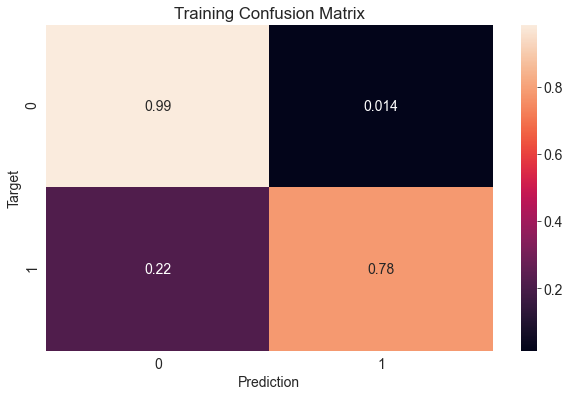

In [75]:
predict_and_plot(train_inputs,train_targets, 'Training')

Accuracy: 76.08%


array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

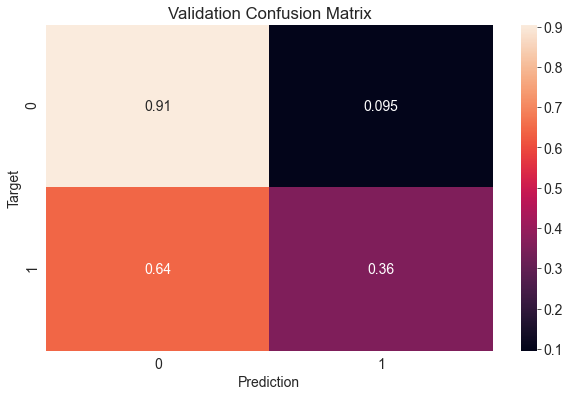

In [76]:
predict_and_plot(val_inputs, val_targets, 'Validation')

In [79]:
val_inputs.head(1)

,latitude,longitude,width,height,size,names,descriptions,captions
7497,0.111111,-0.376068,-1.51,1.227642,0.372093,0.543938,0.0,0.287364


In [89]:
new_data = val_inputs.to_numpy()

In [108]:
new = new_data[1].reshape(1,-1)

In [103]:
def pred_new(data):
    val = model3.predict(data)
    if val < 1:
        return 'No'
    else:
        return 'Yes'

In [109]:
pred_new(new)

'Yes'

In [110]:
import pickle

In [115]:
pickle.dump(pred_new,open('classmodel.pkl', 'wb'))

In [116]:
pickled = pickle.load(open('classmodel.pkl','rb'))

In [118]:
pickled(new)

'Yes'